In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/imdb-dataset-toprated-films-18982022/IMDb_Data_final.csv


In [6]:
import matplotlib.pyplot as plt
df=pd.read_csv("../input/imdb-dataset-toprated-films-18982022/IMDb_Data_final.csv")
df.describe()

,IMDb-Rating,ReleaseYear
count,1000.000000,1000.00000
mean,7.959900,1991.22400
std,0.277018,23.84484
min,7.600000,1920.00000
25%,7.700000,1975.00000
50%,7.900000,1999.00000
75%,8.100000,2010.00000
max,9.300000,2022.00000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Title                1000 non-null   object 
 1   Director             1000 non-null   object 
 2   Stars                1000 non-null   object 
 3   IMDb-Rating          1000 non-null   float64
 4   Category             999 non-null    object 
 5   Duration             999 non-null    object 
 6   Censor-board-rating  846 non-null    object 
 7   ReleaseYear          1000 non-null   int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 62.6+ KB


In [8]:
df.head(5)

,Title,Director,Stars,IMDb-Rating,Category,Duration,Censor-board-rating,ReleaseYear
0,Top Gun: Maverick,JosephKosinski,"TomCruise, JenniferConnelly, MilesTeller, ValK...",8.6,"Action,Drama",130min,UA,2022
1,Everything Everywhere All at Once,"DanKwan,",", MichelleYeoh, StephanieHsu, KeHuyQuan, James...",8.3,"Action,Adventure,Comedy",139min,R,2022
2,The Batman,MattReeves,"RobertPattinson, ZoëKravitz, JeffreyWright, Co...",7.9,"Action,Crime,Drama",176min,UA,2022
3,Jurassic Park,StevenSpielberg,"SamNeill, LauraDern, JeffGoldblum, RichardAtte...",8.2,"Action,Adventure,Sci-Fi",127min,UA,1993
4,The Godfather,FrancisFordCoppola,"MarlonBrando, AlPacino, JamesCaan, DianeKeaton",9.2,"Crime,Drama",175min,A,1972


In [9]:

df.tail(5)

,Title,Director,Stars,IMDb-Rating,Category,Duration,Censor-board-rating,ReleaseYear
995,Vizontele,"YilmazErdogan,",", YilmazErdogan, DemetAkbag, AltanErkekli, Cem...",8.0,"Comedy,Drama",110min,NaN,2001
996,Sarfarosh,JohnMathewMatthan,"AamirKhan, NaseeruddinShah, SonaliBendre, Muke...",8.1,"Action,Drama,Thriller",174min,A,1999
997,Udaan,VikramadityaMotwane,"RajatBarmecha, RonitRoy, ManjotSingh, RamKapoor",8.1,Drama,134min,UA,2010
998,English Vinglish,GauriShinde,"Sridevi, AdilHussain, MehdiNebbou, PriyaAnand",7.8,"Comedy,Drama,Family",134min,U,2012
999,Anand,HrishikeshMukherjee,"RajeshKhanna, AmitabhBachchan, SumitaSanyal, R...",8.1,"Drama,Musical",122min,U,1971


In [10]:
title_imdb=df[["Title", "IMDb-Rating"]]
title_imdb.head()

,Title,IMDb-Rating
0,Top Gun: Maverick,8.6
1,Everything Everywhere All at Once,8.3
2,The Batman,7.9
3,Jurassic Park,8.2
4,The Godfather,9.2


9.2


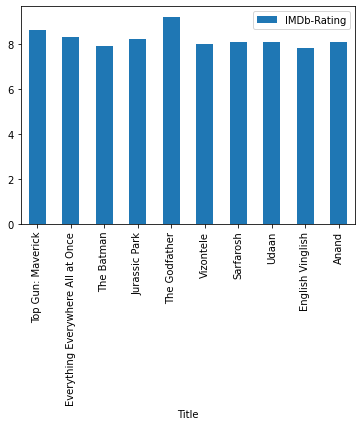

In [11]:
quesn_1a = title_imdb.iloc[0:5, ] 
quesn_1b = title_imdb.iloc[995:1000,]
#print(quesn_1)
#print(quesn_2)
req_dataset=quesn_1a.append(quesn_1b)
#print(x)
req_dataset.plot.bar(x="Title", y="IMDb-Rating")
plt.legend()
print(req_dataset["IMDb-Rating"].max())

From the barplot we can observe that "The Godfather" movie has the highest IMDb-rate.

In [12]:
dir_imdb=df.groupby("Director")["IMDb-Rating"].mean()
x=dir_imdb.sort_values(ascending=False)
print(x)

Director
FrankDarabont     8.95
T.J.Gnanavel      8.90
IrvinKershner     8.70
SudhaKongara      8.70
LanaWachowski,    8.70
                  ... 
PierreCoffin,     7.60
JoelSchumacher    7.60
BlakeEdwards      7.60
BennettMiller     7.60
DanielMonzón      7.60
Name: IMDb-Rating, Length: 572, dtype: float64


We can observe that director "FrankDarabont" movies have the highest imdb rating i.e; 8.95

In [13]:
dir_imdb.describe()

count    572.000000
mean       7.931257
std        0.229572
min        7.600000
25%        7.750000
50%        7.900000
75%        8.100000
max        8.950000
Name: IMDb-Rating, dtype: float64

Average imdb rating of all the directors is 7.93 

In [14]:
x.head(10)

Director
FrankDarabont         8.95
T.J.Gnanavel          8.90
IrvinKershner         8.70
SudhaKongara          8.70
LanaWachowski,        8.70
JosephKosinski        8.60
FernandoMeirelles,    8.60
RobertoBenigni        8.60
MasakiKobayashi       8.60
MilosForman           8.55
Name: IMDb-Rating, dtype: float64

The above list mentions the top 10 directors with highest imdb ratings

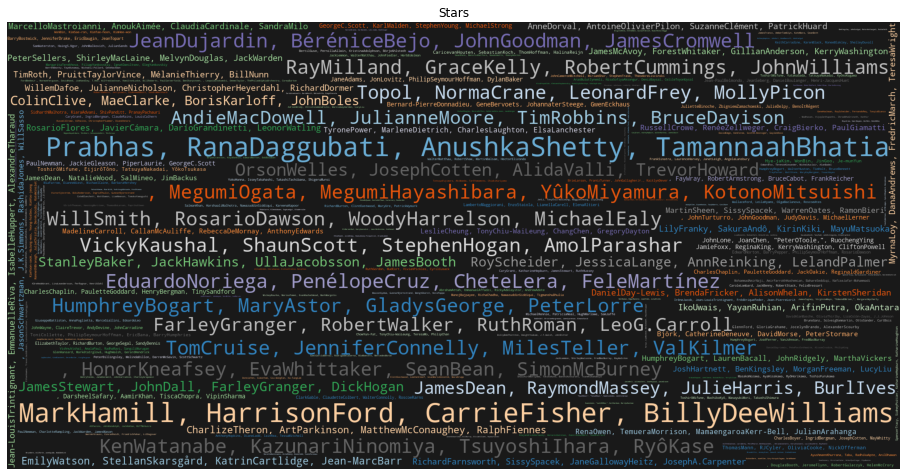

In [15]:
from wordcloud import WordCloud
plt.figure(figsize=(16,10))
data = df['Stars'].value_counts().to_dict()
wc = WordCloud(width= 2000, height = 1000, random_state=1,background_color='#191919', colormap='tab20c').generate_from_frequencies(data)
plt.imshow(wc)
plt.title('Stars')
plt.axis('off')
plt.show()

<AxesSubplot:title={'center':'Catgories Vs Imdb rating'}, xlabel='Category'>

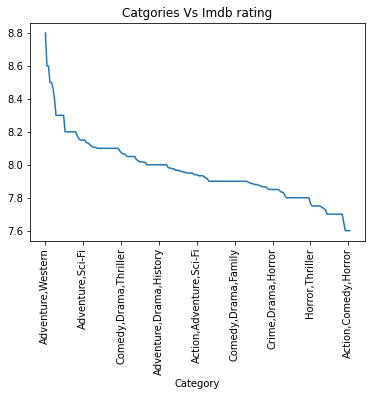

In [16]:
cat_imdb=df.groupby("Category")["IMDb-Rating"].mean()
y=cat_imdb.sort_values(ascending=False)
y.plot(rot=90, title="Catgories Vs Imdb rating")

<AxesSubplot:title={'center':'Censor-board-rating Vs imdb rating'}, ylabel='Frequency'>

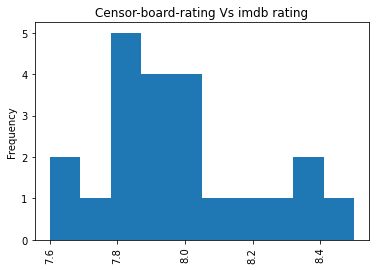

In [17]:
cen_imdb=df.groupby("Censor-board-rating")["IMDb-Rating"].mean()
w=cen_imdb.sort_values(ascending=False)
w.plot.hist(rot=90, title="Censor-board-rating Vs imdb rating")

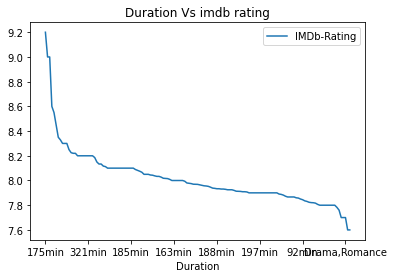

In [18]:
dur_imdb=df.groupby("Duration")["IMDb-Rating"].mean()
a=dur_imdb.sort_values(ascending=False)
a.plot( title="Duration Vs imdb rating")
plt.legend()

Text(0.5, 1.0, 'Frequency of censor board rating')

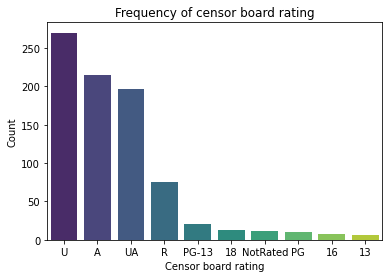

In [19]:
import seaborn as sns
censor = sns.countplot(x='Censor-board-rating',data=df, order=df['Censor-board-rating'].value_counts().index[0:10],palette='viridis')
plt.ylabel('Count')
plt.xlabel('Censor board rating')
plt.title('Frequency of censor board rating')

We can observe that most of the movies released in 1898 to 2022 are U rated

In [20]:
df["Duration"]= df["Duration"].str.split("m").str.get(0)
df["Duration"][639]=0
df["Duration"]= pd.to_numeric(df["Duration"])


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


<AxesSubplot:title={'center':'Duration Vs Category'}, xlabel='Category'>

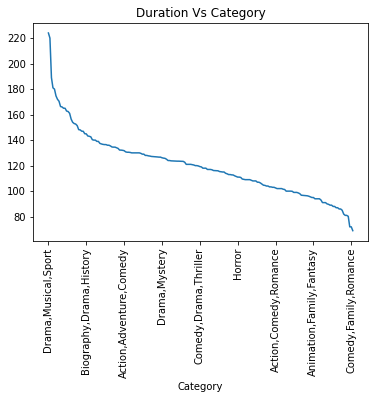

In [21]:
dur_cat=df.groupby("Category")["Duration"].mean()
b=dur_cat.sort_values(ascending=False)
b.plot( rot=90,title="Duration Vs Category")

Drama,Musical,Sport has the highest duration whereas comedy,family,romance has the lowest duration of movie time

In [44]:
import plotly.express as px
censor = df['Censor-board-rating'].value_counts()[0:5].to_frame(name = 'Count')
u=px.pie(censor, names=censor.index,values=censor.Count,title='Censor board rating')
u.show()

Text(0.5, 51.0, 'Year')

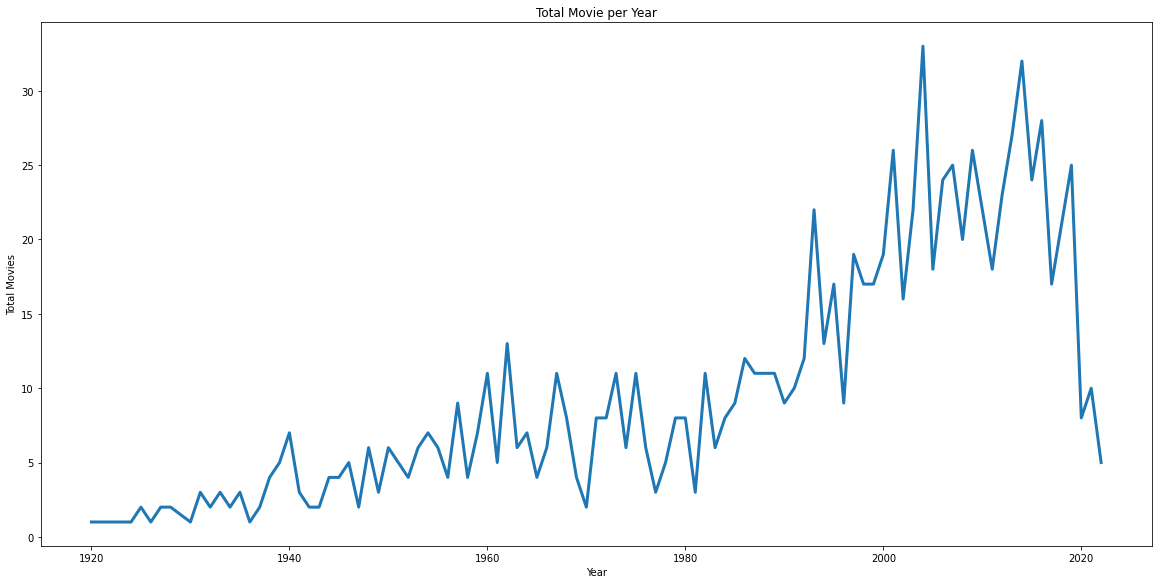

In [22]:
plt.figure(figsize=(16,8))
df.groupby('ReleaseYear').count()['Title'].plot(linewidth = 3)
plt.tight_layout()
plt.title('Total Movie per Year')
plt.ylabel("Total Movies")
plt.xlabel("Year")

<AxesSubplot:title={'center':'Duration Vs Imdb rating'}, xlabel='IMDb-Rating', ylabel='Duration'>

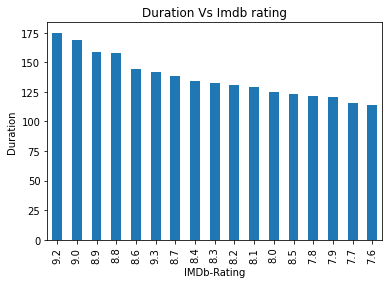

In [23]:
dur_imdb=df.groupby("IMDb-Rating")["Duration"].mean()
c=dur_imdb.sort_values(ascending=False)
c.plot.bar( rot=90,ylabel="Duration", title="Duration Vs Imdb rating")

Director
KennethBranagh       242.0
AnuragKashyap        232.5
CecilB.DeMille       220.0
AshutoshGowariker    217.0
RameshSippy          204.0
Name: Duration, dtype: float64

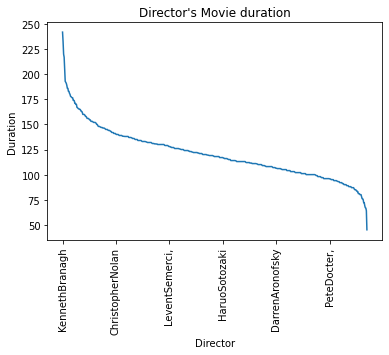

In [35]:
dur_dir=df.groupby("Director")["Duration"].mean()
c=dur_dir.sort_values(ascending=False)
c.plot( rot=90,ylabel="Duration", title="Director's Movie duration")
c.head()

## **Problem Statement::**

### Find the Highest IMDb Rated movie from the first five movies and  last five movies in the dataset

### 1) You can use matplotlib features like bar plot , hist or any other plotting feature to reach a conclusion 

### 2) What other conclusions can be made about the dataset given here?
